# WiDS Datathon 2024: Predicting Metastatic Breast Cancer Diagnosis Period



## Objective
Our task is to predict whether the diagnosis period for patients is less than 90 days, utilizing a range of patient characteristics, diagnosis information, and environmental factors.


In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [4]:
train=df
train.shape

(12906, 83)

In [5]:
train.describe().T.style.background_gradient(cmap='inferno').format("{:.2f}")


,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [6]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [7]:
RED, BOLD, RESET = '\033[91m', '\033[1m', '\033[0m'
print(f"The data consists of {BOLD}{RED}{train.shape[0]}{RESET} rows, and {BOLD}{RED}{train.shape[1]}{RESET} columns") 


The data consists of 12906 rows, and 83 columns


In [8]:
RED, BOLD, RESET = '\033[91m', '\033[1m', '\033[0m'
total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")


The total number of missing values are 43292,which is 4.04% of total data.


In [9]:
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")

In [10]:
RED, BOLD, RESET = '\033[91m', '\033[1m', '\033[0m'

# Lets check count & % of missing values in the dataset
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")


metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
N02 has 29 missing values, which is 0.22% of the column.
income_household_75_to_100 has 4 missing values, which is 0.03% of the column.
income_household_150_over has 4 missing values, which is 0.03% of the column.
income_household_15_to_20 has 4 missing values, which is 0.03% of the column.
income_household_20_t

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(self.cols, axis=1)


In [12]:
dropped_columns = ['patient_race', 'payer_type', 'bmi', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
transformed_data = DropColumn(cols=dropped_columns).fit_transform(train)

In [13]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [14]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median', columns=None):
        self.strategy = strategy
        self.columns = columns

    def fit(self, X, y=None):
        if self.strategy == 'median':
            if self.columns is not None:
                self.fill_values = X[self.columns].median()
            else:
                self.fill_values = X.mean()
        elif self.strategy == 'mode':
            if self.columns is not None:
                self.fill_values = X[self.columns].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.columns is not None:
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [15]:
# Initialize the MeanImputer with numerical_cols for mean imputation
median_imputer = MissingDataImputer(strategy='median', columns=numerical_cols)

# Fit and transform the train and test data using the specified numerical columns
df_train_median = median_imputer.fit_transform(train)

In [16]:
df_train_median.describe().T.style.background_gradient(cmap='viridis_r').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,12906.00,28.43,3.17,14.00,28.19,28.19,28.19,85.00
population,12906.00,20744.32,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.88,2966.20,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [17]:
# Initialize the ModeImputer with categorical_cols for mode imputation
mode_imputer = MissingDataImputer(strategy='mode', columns=categorical_cols)

# Fit and transform the train and 



#data using the specified categorical columns
df_train_mode = mode_imputer.fit_transform(train)

In [18]:
#Categorical Columns
df_train_mode.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,12906,5,White,9973
payer_type,12906,3,COMMERCIAL,7835
patient_state,12906,50,CA,2489
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,12906,2,PEMBROLIZUMAB,12895
metastatic_first_novel_treatment_type,12906,1,Antineoplastics,12906
Region,12906,4,South,3971


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       categorical_cols),
                                     ],
                                     remainder='passthrough')

multicolumn_prep


ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object'))])

In [21]:
# Define a custom transformer to replace double underscores with a single underscore
class ReplaceDoubleUnderscores:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = X_copy.columns.str.replace('__', '_')
        return X_copy

In [22]:
class RenameColumns(BaseEstimator, TransformerMixin):
    def __init__(self, replace_dict):
        self.replace_dict = replace_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = [col.translate(self.replace_dict) for col in X_copy.columns]
        return X_copy

In [23]:
replace_dict = {ord('['): '_', ord(']'): '_', ord(':'): '_', ord(' '): '_', ord('('): '_', ord(')'): '_', ord(','): '_'}

In [24]:
class CommuteBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['commute_time'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_commute_time',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
CommuteBinning(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_commute_time
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,2.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,3.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,2.0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,0.0
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,4.0
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,2.0
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,4.0


In [25]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [26]:
class PZIP3Binning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['patient_zip3'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_patient_zip3',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
PZIP3Binning(10).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut10_patient_zip3
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,8
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,9
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,6
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,8
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,3
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,9
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,8
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,0


In [27]:
class PAgeBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['patient_age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_patient_age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
PAgeBinning(7).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut7_patient_age
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,6
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,3
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,0


In [28]:
class OzoneBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Ozone'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_Ozone',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
OzoneBinning(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_Ozone
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,3.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,4.0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,2.0
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,0.0
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,4.0
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,1.0


In [29]:
class PM25Binning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['PM25'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_PM25',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
PM25Binning(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_PM25
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,2.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,1.0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,3.0
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,0.0
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,1.0
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,2.0


In [30]:
class N02Binning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['N02'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_N02',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
N02Binning(5).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,QCut5_N02
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,3.0
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,2.0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,2.0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,3.0
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,1.0
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,2.0
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,4.0


In [31]:
class BC_MCTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['BC_MC_Interact'] = X_copy['breast_cancer_diagnosis_desc'] + '_' + X_copy['metastatic_cancer_diagnosis_code']
        return X_copy
    
BC_MCTransformer().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,BC_MC_Interact
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,Malignant neoplasm of unsp site of unspecified...
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,Malig neoplm of upper-outer quadrant of right ...
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,Malignant neoplasm of central portion of left ...
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,Malig neoplasm of upper-inner quadrant of left...
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,"Malignant neoplasm of breast (female), unspeci..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,Malig neoplm of upper-outer quadrant of right ...
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,Malignant neoplasm of unspecified site of left...
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,Malignant neoplasm of unspecified site of left...
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,"Malignant neoplasm of breast (female), unspeci..."


In [32]:
#all columns linked to geo-demographic
train.columns[13:82]
geo_demo_list = train.columns[13:82].tolist()
geo_demo_list

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [33]:
from sklearn.pipeline import Pipeline

named_preprocessing_pipeline = Pipeline([
    ('medianimpute', MissingDataImputer(strategy='median', columns=numerical_cols)), 
    ('modeimpute', MissingDataImputer(strategy='mode', columns=categorical_cols)),
    ('PZIP_binning', PZIP3Binning(10)),
    ('Commute_binning', CommuteBinning(5)),
    ('age_binning', PAgeBinning(10)),
    ('Ozone_binning', OzoneBinning(10)),
    ('PM25_binning', PM25Binning(10)),
    ('N02_binning', N02Binning(10)),
    ('BC_MC', BC_MCTransformer()),
     ('drop', DropColumn(cols=geo_demo_list + ['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type'])),
     ('prep', ColumnTransformer([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
         list(set(categorical_cols).union(['QCut10_patient_zip3','QCut5_commute_time','QCut10_patient_age','QCut10_Ozone','QCut10_PM25','QCut10_N02','BC_MC_Interact']) # Add feature engineered columns
               - set(geo_demo_list)-set(['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']) # Exclude categorical_cols that were dropped.
             )) 
    ],
    remainder='passthrough').set_output(transform='pandas')),
    ('replacedouble', ReplaceDoubleUnderscores()),  # Add the ReplaceDoubleUnderscores transformer after encoding
    ('rename_columns', RenameColumns(replace_dict))  # Add the RenameColumns transformer
])

named_preprocessing_pipeline        

Pipeline(steps=[('medianimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income...
                                                   'breast_cancer_diagnosis_code',
                                                   'QCut10_Ozone',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'QCut10_PM25',
                                                   'BC_MC_Interact',
                                                   'QCut10_N02',
                                                   'QCut5_commute_time',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x788b612b64d0>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'}))])

In [34]:
X = train.drop(['DiagPeriodL90D'], axis=1) 
y = train['DiagPeriodL90D']

In [35]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Columns: 814 entries, encode_QCut10_patient_zip3_0 to remainder_patient_age
dtypes: float64(811), int64(3)
memory usage: 80.2 MB


In [36]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 814 entries, encode_QCut10_patient_zip3_0 to remainder_patient_age
dtypes: float64(811), int64(3)
memory usage: 36.0 MB


In [37]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
    
    
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [38]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',StandardScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('medianimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income...
                                                   'metastatic_cancer_diagnosis_code',
                                                   'QCut10_PM25',
                                                   'BC_MC_Interact',
                                                   'QCut10_N02',
                                                   'QCut5_commute_time',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x788b612b64d0>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'})),
                ('scale', StandardScaler())])

In [39]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [40]:
#XGBoost best parameters {'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.03623064007788684, 'n_estimators': 156, 'subsample': 0.7998314753884036, 'colsample_bytree': 0.7477252560918937, 'random_state': 42}
xgb_params_optuna = {'max_depth': 7, 
                     'min_child_weight': 7, 
                     'learning_rate': 0.03623064007788684, 
                     'n_estimators': 156, 
                     'subsample': 0.7998314753884036, 
                     'colsample_bytree': 0.7477252560918937, 
                     'random_state': 42}

# XGBoost model
xgb_model = XGBClassifier(**xgb_params_optuna)

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'fami...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.03623064007788684, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=7, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=156, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [41]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    xgb_pipeline.fit(X_train, y_train)

    # predictions on the validation set
    y_val_pred_prob = xgb_pipeline.predict(X_val)
    y_pred = xgb_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    # results
    cv_results.append(roc_auc)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

Fold 1, AUC Score on Validation Set: 0.7570578905630453
Fold 1, F1 Score on Validation Set: 0.7950497435011291
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.7461372182855388
Fold 2, F1 Score on Validation Set: 0.7857183562752161
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7659346141055486
Fold 3, F1 Score on Validation Set: 0.8040409838911018
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.7587181192601878
Fold 4, F1 Score on Validation Set: 0.7975253329764885
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7465477987260495
Fold 5, F1 Score on Validation Set: 0.7859482190172679
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.7644841523624364
Fold 6, F1 Score on Validation Set

In [42]:
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [43]:
# Fit the ensemble final model
xgb_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = xgb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

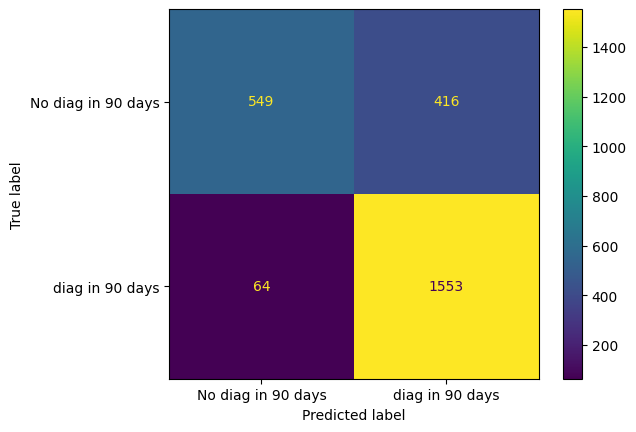

In [44]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_pipeline.fit(X = X_train,
                y = y_train)

predictions_xgb = xgb_pipeline.predict(X_val)

cm_xgb = confusion_matrix(y_val, predictions_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No diag in 90 days', 'diag in 90 days'])
disp.plot()
plt.show()

In [45]:
# import pandas as pd

# # Assuming predictions_xgb is the array containing your model predictions
# predictions_df = pd.DataFrame({'Predictions': predictions_xgb})

# # Save predictions to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)

# Provide a link to download the file
from IPython.display import FileLink
FileLink('submission_baseline.csv')


/kaggle/working/submission_baseline.csv

In [46]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss


In [47]:

catboost_params_optuna = {'iterations': 1040, 
                          'depth': 9, 
                          'min_data_in_leaf': 5, 
                          'learning_rate': 0.002900149713837758, 
                          'l2_leaf_reg': 0.23955843591450432, 
                          'border_count': 153, 
                          'subsample': 0.838193643866743, 
                          'colsample_bylevel': 0.8954518445866992}

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna, random_state=42, verbose=0)


cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'fami...
                                                                    'QCut5_commute_time',
                                                                    'patient_state',
                                                                    'breast_cancer_diagnosis_desc'])])),
                                 ('replacedouble',
                                  <__main__.ReplaceDoubleUnderscores object at 0x788b612b64d0>),
                                 ('rename_columns',
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', StandardScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x788b5cbfd000>)])

In [48]:
n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results_LL = []
cv_results_AUC = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    
    cb_pipeline.fit(X_train,y_train)

    y_val_pred_prob = cb_pipeline.predict_proba(X_val)
    y_pred = cb_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC- score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-'*70)

 
    cv_results_LL.append(logloss)
    cv_results_AUC.append(roc_auc)

average_cv_LL_result = sum(cv_results_LL) / n_splits
average_cv_AUC_result = sum(cv_results_AUC) / n_splits


print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_AUC_result}')
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_LL_result}')

Fold 1, AUC- score on Validation Set: 0.7580888183980968
Fold 1, F1 Score on Validation Set: 0.7959792024973639
Fold 1, Log Loss Score on Validation Set: 0.4730626118108762
----------------------------------------------------------------------
Fold 2, AUC- score on Validation Set: 0.749640582231204
Fold 2, F1 Score on Validation Set: 0.7887841044302513
Fold 2, Log Loss Score on Validation Set: 0.4812324191499085
----------------------------------------------------------------------
Fold 3, AUC- score on Validation Set: 0.7632524110409045
Fold 3, F1 Score on Validation Set: 0.801459510824166
Fold 3, Log Loss Score on Validation Set: 0.4712147115629627
----------------------------------------------------------------------
Fold 4, AUC- score on Validation Set: 0.762221483205853
Fold 4, F1 Score on Validation Set: 0.8005304285941154
Fold 4, Log Loss Score on Validation Set: 0.4681603929307848
----------------------------------------------------------------------
Fold 5, AUC- score on Valid

In [49]:
# Fit the ensemble final model
cb_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = cb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

In [50]:
# import pandas as pd

# # Assuming predictions_xgb is the array containing your model predictions
# predictions_df = pd.DataFrame({'Predictions': predictions_xgb})

# # Save predictions to a CSV file
# predictions_df.to_csv('predictions.csv', index=False)

# Provide a link to download the file
from IPython.display import FileLink
FileLink('submission_baseline.csv')

/kaggle/working/submission_baseline.csv

In [51]:
#lgb library
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [52]:
lgbm_params_optuna =  {'max_depth': 7, 
                       'min_child_samples': 19, 
                       'learning_rate': 0.013570653703644641, 
                       'n_estimators': 425, 
                       'subsample': 0.3220447078654888, 
                       'colsample_bytree': 0.6332250329962271, 
                       'reg_alpha': 0.020790829521639388, 
                       'reg_lambda': 0.8238668916252945}
    
# lgbm model
lgbm_model = LGBMClassifier(**lgbm_params_optuna)

lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)
lgbm_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'fami...
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', StandardScaler())])),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.6332250329962271,
                                learning_rate=0.013570653703644641, max_depth=7,
                                min_child_samples=19, n_estimators=425,
                                reg_alpha=0.020790829521639388,
                                reg_lambda=0.8238668916252945,
                                subsample=0.3220447078654888))])

In [54]:
from sklearn.metrics import log_loss

# folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    lgbm_pipeline.fit(X_train,y_train)

    y_val_pred_prob = lgbm_pipeline.predict_proba(X_val)
    y_pred = lgbm_pipeline.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-'*70)

    cv_results.append(roc_auc)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')

Fold 1, AUC-Score on Validation Set: 0.7568481236090149
Fold 1, F1 Score on Validation Set: 0.7945336547307293
Fold 1, Log Loss Score on Validation Set: 0.467946389513579
----------------------------------------------------------------------
Fold 2, AUC-Score on Validation Set: 0.7512918574607966
Fold 2, F1 Score on Validation Set: 0.7904472217182021
Fold 2, Log Loss Score on Validation Set: 0.4723532692711422
----------------------------------------------------------------------
Fold 3, AUC-Score on Validation Set: 0.7642833388759561
Fold 3, F1 Score on Validation Set: 0.8023873213079041
Fold 3, Log Loss Score on Validation Set: 0.46693325440489575
----------------------------------------------------------------------
Fold 4, AUC-Score on Validation Set: 0.7642833388759561
Fold 4, F1 Score on Validation Set: 0.8023873213079041
Fold 4, Log Loss Score on Validation Set: 0.4582650141964065
----------------------------------------------------------------------
Fold 5, AUC-Score on Validat

In [55]:
# Fit the ensemble final model
lgbm_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = lgbm_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

In [56]:
from IPython.display import FileLink
FileLink('submission_baseline.csv')

/kaggle/working/submission_baseline.csv

In [57]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, roc_auc_score, f1_score

# Define the parameters for LightGBM obtained from optimization
lgbm_params_optuna = {
    'max_depth': 7,
    'min_child_samples': 19,
    'learning_rate': 0.013570653703644641,
    'n_estimators': 425,
    'subsample': 0.3220447078654888,
    'colsample_bytree': 0.6332250329962271,
    'reg_alpha': 0.020790829521639388,
    'reg_lambda': 0.8238668916252945
}

# Create LightGBM model
lgbm_model = LGBMClassifier(**lgbm_params_optuna)

# Create a pipeline with preprocessing steps (modelling_pipeline) and LightGBM model
lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)

# Number of folds for cross-validation
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fit the pipeline on training data
    lgbm_pipeline.fit(X_train, y_train)

    # Predict probabilities and labels on validation set
    y_val_pred_prob = lgbm_pipeline.predict_proba(X_val)
    y_pred = lgbm_pipeline.predict(X_val)

    # Calculate evaluation metrics
    f1 = f1_score(y_val, y_pred, average='weighted')
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)

    # Print evaluation metrics for each fold
    print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-' * 70)

    # Store AUC-ROC score for each fold
    cv_results.append(roc_auc)

# Calculate average AUC-ROC score across all folds
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')


Fold 1, AUC-Score on Validation Set: 0.7568481236090149
Fold 1, F1 Score on Validation Set: 0.7945336547307293
Fold 1, Log Loss Score on Validation Set: 0.467946389513579
----------------------------------------------------------------------
Fold 2, AUC-Score on Validation Set: 0.7512918574607966
Fold 2, F1 Score on Validation Set: 0.7904472217182021
Fold 2, Log Loss Score on Validation Set: 0.4723532692711422
----------------------------------------------------------------------
Fold 3, AUC-Score on Validation Set: 0.7642833388759561
Fold 3, F1 Score on Validation Set: 0.8023873213079041
Fold 3, Log Loss Score on Validation Set: 0.46693325440489575
----------------------------------------------------------------------
Fold 4, AUC-Score on Validation Set: 0.7642833388759561
Fold 4, F1 Score on Validation Set: 0.8023873213079041
Fold 4, Log Loss Score on Validation Set: 0.4582650141964065
----------------------------------------------------------------------
Fold 5, AUC-Score on Validat

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, log_loss, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define parameters for Random Forest Classifier
rf_params = {
    'n_estimators': 100,  # Number of trees in the forest
    'max_depth': 7,       # Maximum depth of the trees
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,   # Minimum number of samples required to be at a leaf node
    'random_state': 42      # Random state for reproducibility
}

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(**rf_params)

# Create a pipeline with preprocessing steps (if any) followed by the Random Forest model
rf_pipeline = make_pipeline(modelling_pipeline, rf_model)

# Define the number of folds for cross-validation
n_splits = 10

# Initialize StratifiedKFold for cross-validation
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store cross-validation results
cv_results = []

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fit the Random Forest model on the training data
    rf_pipeline.fit(X_train, y_train)

    # Predict probabilities on the validation set
    y_val_pred_prob = rf_pipeline.predict_proba(X_val)
    y_pred = rf_pipeline.predict(X_val)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_val, y_pred, average='weighted')
    logloss = log_loss(y_val, y_val_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred)
    
    # Print evaluation metrics
    print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-' * 70)

    # Store AUC scores for each fold
    cv_results.append(roc_auc)

# Calculate average AUC score across all folds
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')


Fold 1, AUC-Score on Validation Set: 0.7387109564861477
Fold 1, F1 Score on Validation Set: 0.7785681020098291
Fold 1, Log Loss Score on Validation Set: 0.5394766076190595
----------------------------------------------------------------------
Fold 2, AUC-Score on Validation Set: 0.7224258780793533
Fold 2, F1 Score on Validation Set: 0.7635069571790009
Fold 2, Log Loss Score on Validation Set: 0.5443797064987441
----------------------------------------------------------------------
Fold 3, AUC-Score on Validation Set: 0.7366580542835948
Fold 3, F1 Score on Validation Set: 0.7773326166074019
Fold 3, Log Loss Score on Validation Set: 0.5296709322436042
----------------------------------------------------------------------
Fold 4, AUC-Score on Validation Set: 0.7449054769640071
Fold 4, F1 Score on Validation Set: 0.7850171579220567
Fold 4, Log Loss Score on Validation Set: 0.5324258389690147
----------------------------------------------------------------------
Fold 5, AUC-Score on Validat

In [60]:
# Fit the ensemble final model
rf_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = rf_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)
from IPython.display import FileLink
FileLink('submission_baseline.csv')

/kaggle/working/submission_baseline.csv

In [53]:
# df.columns